<a href="https://colab.research.google.com/github/rajput-t/ml_algorithms/blob/main/k_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors (k-NN)

The k-Nearest Neighbors (k-NN) algorithm is a simple, non-parametric algorithm used for both classification and regression tasks.

**How it works:**

*   **Classification:** To classify a new data point, k-NN looks at its `k` nearest neighbors in the training data based on a distance metric (commonly Euclidean distance). The new data point is assigned the class that is most common among its k neighbors.
*   **Regression:** For regression, k-NN predicts the value for a new data point by taking the average (or weighted average) of the values of its k nearest neighbors.

**Key Hyperparameter: k**

The value of `k` is crucial.
*   A small `k` makes the model sensitive to noise and outliers.
*   A large `k` smooths out the decision boundary but might miss local patterns.

Choosing the optimal `k` often involves experimentation, as demonstrated in the "Visualizing Accuracy vs. k" section.

## k-NN Classifier on Iris Dataset

**Code Explanation (k-NN Classifier):**

This cell demonstrates a k-NN classifier on the Iris dataset.

*   `KNeighborsClassifier(n_neighbors=5)`: This line initializes the k-NN classifier. The `n_neighbors` parameter is set to `5`, meaning the algorithm will consider the 5 nearest neighbors for classification.
*   `knn.fit(X_train, y_train)`: This trains the k-NN model using the training data. In k-NN, training simply involves storing the training data.
*   `knn.predict(y_test)`: This line makes predictions on the test data. For each data point in `X_test`, the model finds its 5 nearest neighbors in the training data (`X_train`) and predicts the class based on the majority class among those neighbors.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Visualizing Accuracy vs. k

**Code Explanation (Visualizing Accuracy vs. k):**

This cell explores how the accuracy of the k-NN classifier changes with different values of `k`.

*   `k_values = list(range(1, 21))`: Creates a list of `k` values to test, from 1 to 20.
*   `for k in k_values:`: Loops through each `k` value.
*   `model = KNeighborsClassifier(n_neighbors=k)`: Initializes a new k-NN model for each `k`.
*   `model.fit(X_train, y_train)`: Trains the model with the current `k`.
*   `score = model.score(X_test, y_test)`: Calculates the accuracy of the model on the test data for the current `k`. The `score` method for classifiers returns the mean accuracy.
*   `accuracies.append(score)`: Stores the accuracy for the current `k`.
*   `plt.plot(k_values, accuracies, marker='o')`: Plots the calculated accuracies against their corresponding `k` values, showing how accuracy changes as `k` increases.

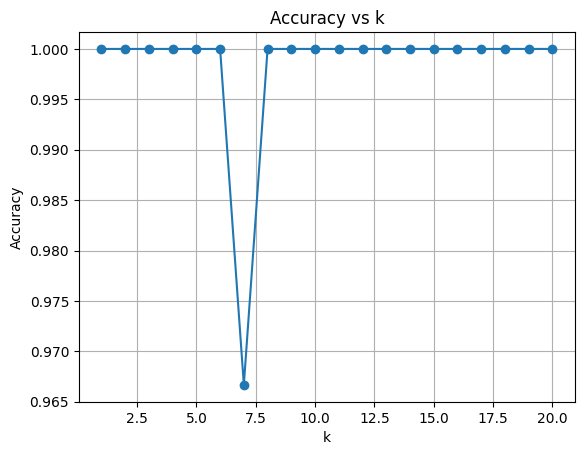

In [2]:
# Test accuracy for different k values
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracies.append(score)

# Plot
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## k-NN for Regression (Bonus Example)

**Code Explanation (k-NN for Regression):**

This cell provides a bonus example of using k-NN for a regression task.

*   `make_regression(...)`: Generates synthetic data suitable for regression.
*   `KNeighborsRegressor(n_neighbors=3)`: Initializes the k-NN regressor. Similar to the classifier, `n_neighbors` is set to 3, meaning it will consider the 3 nearest neighbors.
*   `knn_reg.fit(Xr_train, yr_train)`: Trains the regressor by storing the training data.
*   `yr_pred = knn_reg.predict(Xr_test)`: Makes predictions on the test data. For each point in `Xr_test`, it finds its 3 nearest neighbors in `Xr_train` and predicts the target value by averaging the target values of those neighbors.
*   `mean_squared_error(yr_test, yr_pred)`: Evaluates the performance of the regressor using Mean Squared Error (MSE), a common metric for regression tasks. MSE measures the average squared difference between the actual and predicted values.

In [3]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
Xr, yr = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Train k-NN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(Xr_train, yr_train)

# Predict and evaluate
yr_pred = knn_reg.predict(Xr_test)
print("MSE:", mean_squared_error(yr_test, yr_pred))

MSE: 287.67115500435614


# Task
Visualize the decision boundary of the K-Nearest Neighbors algorithm on the Iris dataset using different values of K.

## Load and prepare data

### Subtask:
Load the Iris dataset and select two features for visualization. This makes it easier to plot the decision boundary in 2D.


In [4]:
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Select the first two features
X_2d = X[:, :2]

## Train k-nn models

### Subtask:
Train k-NN models with different values of `k`.


**Reasoning**:
Iterate through the defined k values, train a KNeighborsClassifier for each k, and store the trained models in a dictionary.



In [5]:
k_values_viz = [1, 5, 10, 15]
trained_models = {}

for k in k_values_viz:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_2d, y)
    trained_models[k] = model

## Create a meshgrid

### Subtask:
Create a meshgrid of points to cover the feature space.


**Reasoning**:
Determine the range for the meshgrid and create the meshgrid of points.



In [6]:
import numpy as np

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Reshape meshgrid points
mesh_points = np.c_[xx.ravel(), yy.ravel()]

## Predict on the meshgrid

### Subtask:
Use the trained k-NN models to predict the class for each point in the meshgrid.


**Reasoning**:
Iterate through the trained models and predict the class for each point in the meshgrid.



In [7]:
predicted_meshes = {}
for k, model in trained_models.items():
    predicted_meshes[k] = model.predict(mesh_points)

## Plot the decision boundary

### Subtask:
Plot the meshgrid with predicted classes to visualize the decision boundary for each `k`.


**Reasoning**:
Plot the meshgrid with predicted classes to visualize the decision boundary for each `k`.



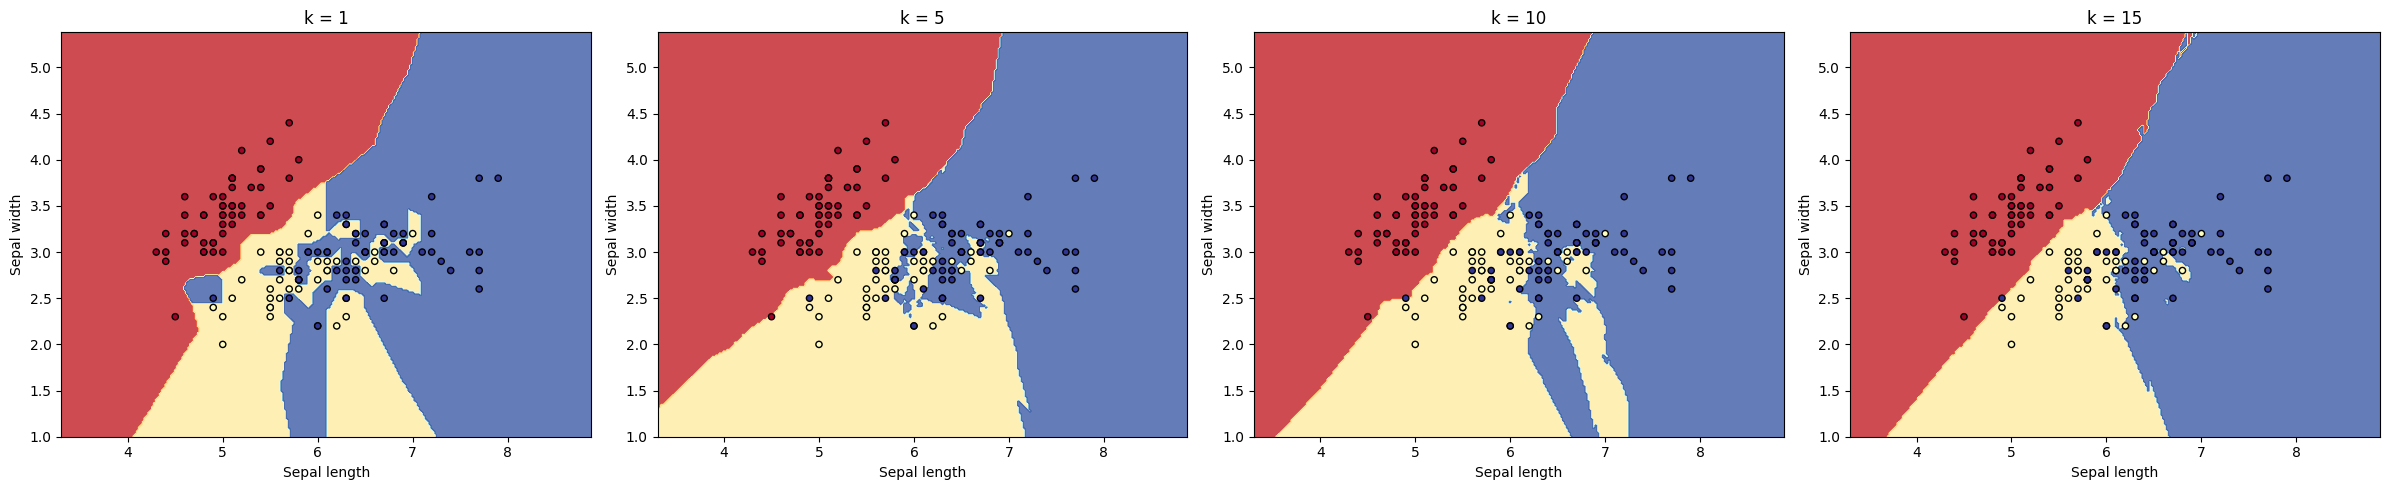

In [8]:
import matplotlib.pyplot as plt
import numpy as np

num_k_values = len(predicted_meshes)
fig, axes = plt.subplots(1, num_k_values, figsize=(6 * num_k_values, 5))

# Flatten axes array if there's only one subplot
if num_k_values == 1:
    axes = [axes]

for i, (k, predicted_mesh) in enumerate(predicted_meshes.items()):
    ax = axes[i]
    Z = predicted_mesh.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')


plt.tight_layout()
plt.show()

## Add labels and title

### Subtask:
Add appropriate labels and a title to the plot for clarity.


**Reasoning**:
Add a title to the entire figure to describe the visualization.



In [9]:
fig.suptitle("KNN Decision Boundaries for Iris Dataset with Different k Values", y=1.02)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Summary:

### Data Analysis Key Findings

*   The analysis successfully loaded the Iris dataset and focused on the first two features (Sepal Length and Sepal Width) for visualization purposes.
*   K-Nearest Neighbors models were trained using different values of `k` (1, 5, 10, and 15) on the selected features.
*   A meshgrid covering the feature space of the two selected features was created to predict class labels across the entire plot area.
*   The trained models were used to predict the class label for each point in the meshgrid, generating predicted class distributions for each `k` value.
*   The predicted class distributions for each `k` were visualized as decision boundaries on a 2D plot, with the original data points overlaid.
*   The plots were labeled with appropriate axis titles ("Sepal length", "Sepal width") and subplot titles indicating the specific `k` value used for each decision boundary.
*   A main title, "KNN Decision Boundaries for Iris Dataset with Different k Values", was added to the overall figure for clarity.

### Insights or Next Steps

*   The visualizations clearly demonstrate how the complexity of the decision boundary changes with the value of `k`. Smaller `k` values result in more complex and potentially overfitting boundaries, while larger `k` values lead to smoother and more generalized boundaries.
*   The next step could involve quantitatively evaluating the performance of the k-NN models with these different `k` values using appropriate metrics (e.g., accuracy, precision, recall) on a separate test set to determine the optimal `k` for this dataset.
